In [1]:
import pandas as pd
import os
import csv
import sys
import numpy as np
import yfinance as yf
import requests
from yahoo_fin.stock_info import get_data
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn import linear_model

In [2]:
import tensorflow

In [3]:
stockresults = "stockresults.csv"
df = pd.read_csv(stockresults)
df

,Unnamed: 0,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Symbol,Adj Close
0,0,2022-10-03,138.210007,143.070007,137.690002,142.449997,114311700.0,0.0,0.0,AAPL,NaN
1,1,2022-10-04,145.029999,146.220001,144.259995,146.100006,87830100.0,0.0,0.0,AAPL,NaN
2,2,2022-10-05,144.070007,147.380005,143.009995,146.399994,79471000.0,0.0,0.0,AAPL,NaN
3,3,2022-10-06,145.809998,147.539993,145.220001,145.429993,68402200.0,0.0,0.0,AAPL,NaN
4,4,2022-10-07,142.539993,143.100006,139.449997,140.089996,85859100.0,0.0,0.0,AAPL,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3954,0,2022-10-03,0.000300,0.000300,0.000300,0.000300,89255.0,0.0,0.0,TEUM,NaN
3955,1,2022-10-04,0.000300,0.000300,0.000300,0.000300,25332.0,0.0,0.0,TEUM,NaN
3956,2,2022-10-05,0.000300,0.000300,0.000300,0.000300,19618.0,0.0,0.0,TEUM,NaN
3957,3,2022-10-06,0.000300,0.000300,0.000300,0.000300,37710.0,0.0,0.0,TEUM,NaN


In [4]:
df.dtypes

Unnamed: 0        int64
Date             object
Open            float64
High            float64
Low             float64
Close           float64
Volume          float64
Dividends       float64
Stock Splits    float64
Symbol           object
Adj Close       float64
dtype: object

In [5]:
results = df[['Volume','Close']]
results = results.reset_index()
results

,index,Volume,Close
0,0,114311700.0,142.449997
1,1,87830100.0,146.100006
2,2,79471000.0,146.399994
3,3,68402200.0,145.429993
4,4,85859100.0,140.089996
...,...,...,...
3954,3954,89255.0,0.000300
3955,3955,25332.0,0.000300
3956,3956,19618.0,0.000300
3957,3957,37710.0,0.000300


In [6]:
results.dropna()

,index,Volume,Close
0,0,114311700.0,142.449997
1,1,87830100.0,146.100006
2,2,79471000.0,146.399994
3,3,68402200.0,145.429993
4,4,85859100.0,140.089996
...,...,...,...
3954,3954,89255.0,0.000300
3955,3955,25332.0,0.000300
3956,3956,19618.0,0.000300
3957,3957,37710.0,0.000300


In [7]:
results = results.dropna()

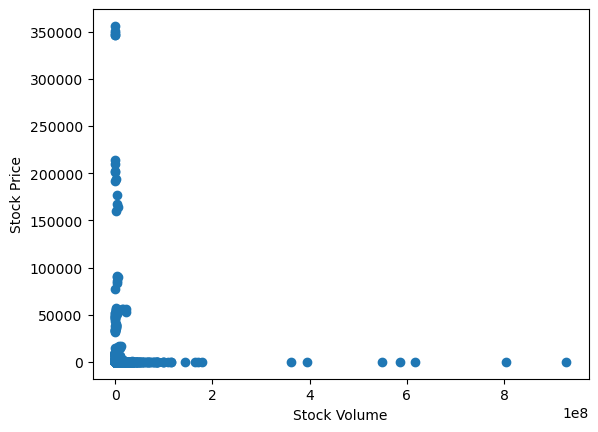

In [8]:
plt.scatter(results.Volume,results.Close)
plt.xlabel('Stock Volume')
plt.ylabel('Stock Price')
plt.show()
#based on graph below, we do not think there will be any accuracy to this linear regression model

In [9]:
#Setting up independent and dependent variables

X = results['Volume']
X = pd.get_dummies(X)


y = results['Close']

In [10]:
# Setting up the model training and testing group
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=2)


# Testing Linear Regression

In [11]:
reg = linear_model.LinearRegression()
reg.fit(results[['Volume']],results.Close)


LinearRegression()

In [12]:
results.dtypes

index       int64
Volume    float64
Close     float64
dtype: object

In [13]:
reg.coef_

array([-4.29979098e-06])

In [14]:
reg.intercept_

1759.09487687602

In [15]:
reg.predict([[1000000]])

C:\Users\Ben\anaconda3\envs\mlenv\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([1754.7950859])

In [16]:
# Calculating the accuracy rate of the model
reg.fit(X_train, y_train)
print(reg.score(X_train, y_train))
print(reg.score(X_test, y_test))

C:\Users\Ben\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float']. An error will be raised in 1.2.
  FutureWarning,


0.9969550415243128
-1.6131183145208377e+25


C:\Users\Ben\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float']. An error will be raised in 1.2.
  FutureWarning,
C:\Users\Ben\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float']. An error will be raised in 1.2.
  FutureWarning,


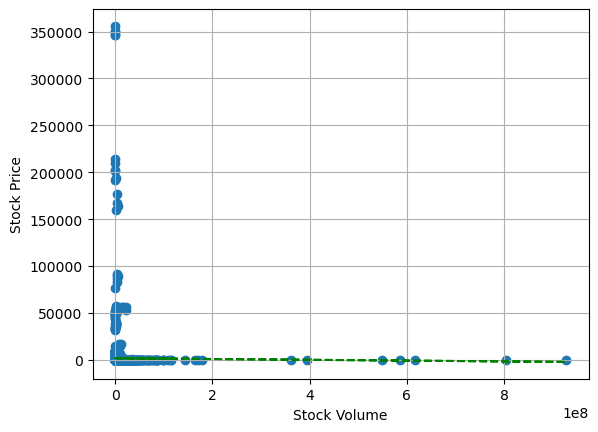

In [17]:
#New Scatter plot below
plt.scatter(results.Volume,results.Close)
plt.xlabel('Stock Volume')
plt.ylabel('Stock Price')
plt.grid(True)
z = np.polyfit(results.Volume, results.Close, 1)
p = np.poly1d(z)
plt.plot(results.Volume, p(results.Volume), "g--")
plt.show()

# Test 1 - Linear Regression Results

Running this test yielded no results. There is no correlation between tech stocks volumes and prices over the course of a week.

# Testing 1 Stock using NN

In [18]:
microsoft = "microsoft.csv"
microsoft_df = pd.read_csv(microsoft)
microsoft_df

,Unnamed: 0,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,0,2022-07-08,264.229162,267.532149,262.732339,267.093079,19658800,0.0,0
1,1,2022-07-11,265.087307,265.965448,261.624656,263.949738,19455200,0.0,0
2,2,2022-07-12,265.316835,265.376705,251.506138,253.132690,35868500,0.0,0
3,3,2022-07-13,249.660068,253.012951,247.584472,252.184708,29497400,0.0,0
4,4,2022-07-14,250.039280,254.599592,245.419081,253.541840,25102800,0.0,0
...,...,...,...,...,...,...,...,...,...
60,60,2022-10-03,235.410004,241.610001,234.660004,240.740005,28880400,0.0,0
61,61,2022-10-04,245.089996,250.360001,244.979996,248.880005,34888400,0.0,0
62,62,2022-10-05,245.990005,250.580002,244.100006,249.199997,20347100,0.0,0
63,63,2022-10-06,247.929993,250.339996,246.080002,246.789993,20239900,0.0,0


In [19]:
microsoft_df = microsoft_df[["Date","Open","High", "Low", "Close", "Volume"]]
microsoft_df

,Date,Open,High,Low,Close,Volume
0,2022-07-08,264.229162,267.532149,262.732339,267.093079,19658800
1,2022-07-11,265.087307,265.965448,261.624656,263.949738,19455200
2,2022-07-12,265.316835,265.376705,251.506138,253.132690,35868500
3,2022-07-13,249.660068,253.012951,247.584472,252.184708,29497400
4,2022-07-14,250.039280,254.599592,245.419081,253.541840,25102800
...,...,...,...,...,...,...
60,2022-10-03,235.410004,241.610001,234.660004,240.740005,28880400
61,2022-10-04,245.089996,250.360001,244.979996,248.880005,34888400
62,2022-10-05,245.990005,250.580002,244.100006,249.199997,20347100
63,2022-10-06,247.929993,250.339996,246.080002,246.789993,20239900


In [20]:
microsoft_df.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object

In [21]:
#https://www.geeksforgeeks.org/python-datetime-toordinal-method-with-example/
microsoft_df['Date'] = pd.to_datetime(microsoft_df['Date'])
microsoft_df['Date'] = microsoft_df['Date'].map(dt.datetime.toordinal)

microsoft_df

C:\Users\Ben\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Ben\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Date,Open,High,Low,Close,Volume
0,738344,264.229162,267.532149,262.732339,267.093079,19658800
1,738347,265.087307,265.965448,261.624656,263.949738,19455200
2,738348,265.316835,265.376705,251.506138,253.132690,35868500
3,738349,249.660068,253.012951,247.584472,252.184708,29497400
4,738350,250.039280,254.599592,245.419081,253.541840,25102800
...,...,...,...,...,...,...
60,738431,235.410004,241.610001,234.660004,240.740005,28880400
61,738432,245.089996,250.360001,244.979996,248.880005,34888400
62,738433,245.990005,250.580002,244.100006,249.199997,20347100
63,738434,247.929993,250.339996,246.080002,246.789993,20239900


In [22]:
# microsoft_df['Date'] = pd.to_datetime(microsoft_df['Date'])
# microsoft_df['Date'] = microsoft_df['Date'].astype(int).astype(float)

# microsoft_df

In [23]:
from sklearn.preprocessing import MinMaxScaler
# 'feature_range = (0,1)' makes sure that training data is scaled to have values between 0 and 1
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(microsoft_df)
training_set_scaled

array([[0.        , 0.51498173, 0.51452635, 0.52566641, 0.57037532,
        0.10456774],
       [0.03296703, 0.53031628, 0.48530061, 0.50625886, 0.5179412 ,
        0.09764507],
       [0.04395604, 0.53441781, 0.47431801, 0.32897388, 0.33750189,
        0.65571937],
       [0.05494505, 0.25464042, 0.24368056, 0.26026297, 0.32168858,
        0.43909339],
       [0.06593407, 0.26141672, 0.27327827, 0.2223235 , 0.34432691,
        0.28967107],
       [0.07692308, 0.35324907, 0.37063349, 0.37670477, 0.38827137,
        0.44850156],
       [0.10989011, 0.42511032, 0.37938251, 0.35100369, 0.34715655,
        0.14932031],
       [0.12087912, 0.38641555, 0.358534  , 0.35764731, 0.43504571,
        0.28660415],
       [0.13186813, 0.42778502, 0.45440026, 0.44908752, 0.4806548 ,
        0.21097495],
       [0.14285714, 0.42582348, 0.45477256, 0.41621769, 0.523434  ,
        0.19793204],
       [0.15384615, 0.52300525, 0.46296258, 0.45188468, 0.4488612 ,
        0.18013573],
       [0.18681319, 0

In [24]:
X_train = []
y_train = []

for i in range(1, 65):
    X_train.append(training_set_scaled[:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

C:\Users\Ben\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  import sys


In [25]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [26]:

# Initialising the RNN
# Regression is when you predict a continuous value
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
# 'units' is the number of LSTM Memory Cells (Neurons) for higher dimensionality
# 'return_sequences = True' because we will add more stacked LSTM Layers
# 'input_shape' of x_train
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
# 20% of Neurons will be ignored (10 out of 50 Neurons) to prevent Overfitting
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
# Not need to specify input_shape for second Layer, it knows that we have 50 Neurons from the previous layer
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
# This is the last LSTM Layer. 'return_sequences = false' by default so we leave it out.
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
# 'units = 1' because Output layer has one dimension
regressor.add(Dense(units = 1))

# Compiling the RNN
# Keras documentation recommends 'RMSprop' as a good optimizer for RNNs
# Trial and error suggests that 'adam' optimizer is a good choice
# loss = 'mean_squared_error' which is good for Regression vs. 'Binary Cross Entropy' previously used for Classification
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
# 'X_train' Independent variables
# 'y_train' Output Truths that we compare X_train to.
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

IndexError: tuple index out of range